In [2]:

!pip install -U scikit-learn


Best number of neighbors: 20
Accuracy: 0.7333333333333333


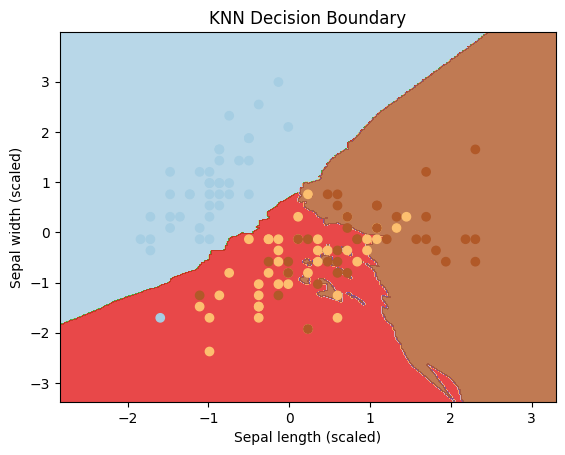

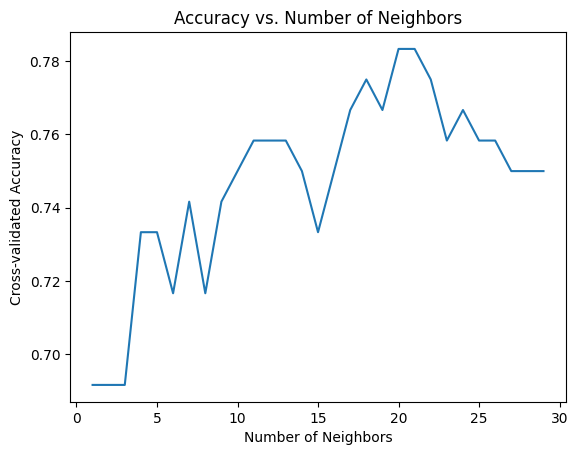

Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  6  5]]


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Using only the first two features for visualization purposes
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Hyperparameter tuning to find the best number of neighbors (k)
neighbors = list(range(1, 30))
cv_scores = []

for k in neighbors:
    knn.n_neighbors = k
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = neighbors[np.argmax(cv_scores)]
print("Best number of neighbors:", best_k)

# Train the KNN classifier with the best k value
knn.n_neighbors = best_k
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn.predict(X_test_scaled)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

# Visualize the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.xlabel('Sepal length (scaled)')
plt.ylabel('Sepal width (scaled)')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('KNN Decision Boundary')
plt.show()

# Accuracy vs. Number of Neighbors Plot
plt.figure()
plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Cross-validated Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
